In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
import torchvision
from torchvision import models

In [12]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

In [13]:
train_path = '/home/gpaudel/Documents/DL/eg/splited/train'
test_path = '/home/gpaudel/Documents/DL/eg/splited/val'

In [14]:
train_dataset = ImageFolder(train_path, transform=transform)
test_dataset = ImageFolder(test_path, transform=transform)

In [41]:
classes = train_dataset.classes

In [42]:
print(classes)

['glass', 'good', 'hat', 'oclusion', 'smile']


In [15]:
train_loader = DataLoader(train_dataset, batch_size=32 ,shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
class_labels = ['glass', 'good', 'smile', 'hat', 'occlusion']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


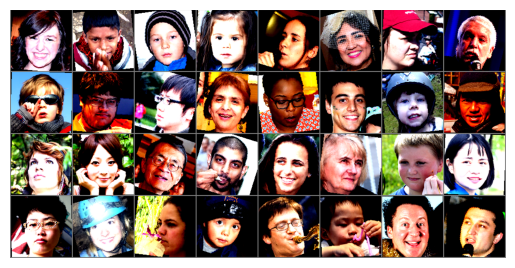

occlusion
hat
smile
good
hat
hat
smile
hat
hat
glass
glass
occlusion
glass
occlusion
smile
smile
good
hat
glass
hat
occlusion
glass
hat
occlusion
glass
smile
hat
smile
hat
hat
occlusion
hat


In [19]:
import matplotlib.pyplot as plt
import numpy as np
def imshow(img):
    img = img / 2 + 0.5  
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

# to get a batch of imagees
img_batch = next(iter(train_loader))
images, labels = img_batch
imshow(torchvision.utils.make_grid(images))
for label in labels:
    print(class_labels[label.item()])

In [ ]:
# class ConvNet(nn.Module):
#      def __init__(self):
#          super(ConvNet, self).__init__()
        
#          self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
#          self.relu1 = nn.ReLU()
#          self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
#          self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
#          self.relu2 = nn.ReLU()
#          self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
#          self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
#          self.relu3 = nn.ReLU()
#          self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
#          self.fc1 = nn.Linear(64 * 16 * 16, 128)
#          self.relu4 = nn.ReLU()
        
#          self.fc2 = nn.Linear(128, 5)  
        
#      def forward(self, op):
#          op = self.pool1(self.relu1(self.conv1(op)))
#          op = self.pool2(self.relu2(self.conv2(op)))
#          op = self.pool3(self.relu3(self.conv3(op)))
#          op = op.view(op.size(0), -1)
#          op = self.relu4(self.fc1(op))
#          op = self.fc2(op)
#          return op

# model = ConvNet()

In [6]:
# class FaceAttributeClassifier(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.mobile_net = models.mobilenet_v3_small(pretrained=True)
#         for param in self.mobile_net.parameters():
#             param.requires_grad = False
#         self.classifier = nn.Sequential(
#             nn.Linear(in_features=1000, out_features=256),
#             nn.ReLU(),
#             nn.Dropout(0.25),
#             nn.Linear(in_features=256, out_features=5)
#         )
        
#     def forward(self, x):
#         x = self.mobile_net(x)
#         x = self.classifier(x)
#         return x 

In [22]:
class FaceAttributeClassifier(nn.Module):

    def __init__(self, ) -> None:
        super().__init__()

        self.base = models.mobilenet_v3_small(pretrained=True)

        self.base.classifier = nn.Sequential(
        nn.Linear(in_features=576,out_features=256),
        nn.BatchNorm1d(256),
        nn.Linear(256,5),
        )
    def forward(self,x):
        return self.base(x)

In [23]:
test = models.mobilenet_v3_small(pretrained=True)

/home/gpaudel/Documents/DL/anaconda3/envs/torch/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/gpaudel/Documents/DL/anaconda3/envs/torch/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [24]:
loss_function = nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FaceAttributeClassifier().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [25]:
best_accuracy = 0.0
best_epoch = 0
num_epochs = 10

test_loss_data = []
test_accuracy_data = []
train_loss_data = []
train_accuracy_data = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0
    test_loss = 0.0

    # scheduler.step()
    
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(images)
        loss = loss_function(outputs, labels)
        
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        train_correct += (predicted == labels).sum().item()

    train_loss /= len(train_loader)
    train_accuracy = 100.0 * train_correct / len(train_dataset)
    train_loss_data.append(train_loss)
    train_accuracy_data.append(train_accuracy)

    
    model.eval()
    test_correct = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            loss = loss_function(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            test_correct += (predicted == labels).sum().item()

    test_loss /= len(test_loader)
    test_accuracy = 100.0 * test_correct / len(test_dataset)
    test_loss_data.append(test_loss)
    test_accuracy_data.append(test_accuracy)

   
    print(f"epoch {epoch + 1}, train loss is: {train_loss:.4f}, train accuracy is: {train_accuracy:.2f}%, test accuracy is: {test_accuracy:.2f}%,test loss {test_loss:.4f}")

    if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_epoch = epoch + 1
            torch.save(model.state_dict(), 'newbest_model.pth')
print(f"best model accuracy is: {best_accuracy:.2f}% achieved at epoch {best_epoch}.")


epoch 1, train loss is: 0.7613, train accuracy is: 72.81%, test accuracy is: 78.42%,test loss 0.7838
epoch 2, train loss is: 0.4721, train accuracy is: 83.76%, test accuracy is: 82.97%,test loss 0.4948
epoch 3, train loss is: 0.3997, train accuracy is: 85.55%, test accuracy is: 81.19%,test loss 0.5410
epoch 4, train loss is: 0.3425, train accuracy is: 87.59%, test accuracy is: 78.81%,test loss 0.5997
epoch 5, train loss is: 0.3224, train accuracy is: 88.92%, test accuracy is: 86.93%,test loss 0.3906
epoch 6, train loss is: 0.2728, train accuracy is: 90.29%, test accuracy is: 82.38%,test loss 0.5543
epoch 7, train loss is: 0.2498, train accuracy is: 91.06%, test accuracy is: 86.14%,test loss 0.4458
epoch 8, train loss is: 0.2200, train accuracy is: 92.59%, test accuracy is: 82.97%,test loss 0.5646
epoch 9, train loss is: 0.2168, train accuracy is: 92.46%, test accuracy is: 85.94%,test loss 0.4940
epoch 10, train loss is: 0.2237, train accuracy is: 92.50%, test accuracy is: 84.95%,test l

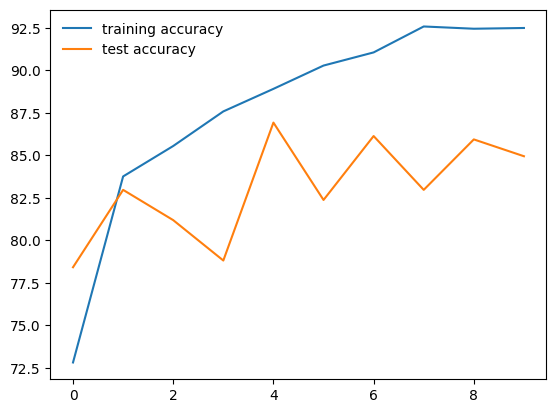

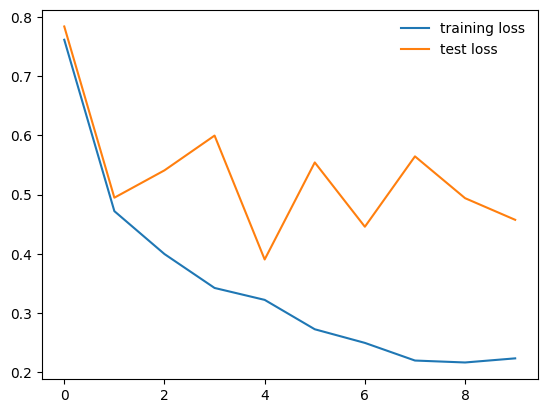

In [26]:
import matplotlib.pyplot as plt
plt.plot(train_accuracy_data, label='training accuracy')
plt.plot(test_accuracy_data, label='test accuracy')
plt.legend(frameon=False)
plt.show()

plt.plot(train_loss_data, label='training loss')
plt.plot(test_loss_data, label='test loss')
plt.legend(frameon=False)
plt.show()

In [ ]:
class_labels = ['glass', 'good', 'smile', 'hat', 'occlusion']

In [1]:
from PIL import Image
def predict(model, test_img_path):
    test_image = Image.open(test_img_path)
    plt.imshow(test_image)


    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    test_img_tensor = transform(test_image).unsqueeze(0)
    test_img_tensor = test_img_tensor.to(device)

    model.eval()
    with torch.no_grad():
        outputs = model(test_img_tensor)
        _, predicted = torch.max(outputs.data, 1)
        predicted_class = class_labels[predicted.item()]

    print("predicted class is:", predicted_class)

In [ ]:
test_img_path = '/home/gpaudel/Documents/Intern/gyanendrap/face_attribute/29044.png'
predict(model, test_img_path)

In [34]:
# index_of_class = {i: class_labels[i] for i in range(len(class_labels))}

In [43]:
# import numpy as np
# import matplotlib.pyplot as plt

# def predict(model, test_img_path):
#     transform = transform['test']
#     test_img = Image.open(test_img_path)
#     plt.imshow(test_img)
#     test_img_tensor = transform(test_img)
    
#     test_img_tensor = test_img_tensor.view(1, 3, 128, 128)
#     with torch.no_grad():
#         model.eval()
#         out = model(test_img_tensor)
#         _, topclass = torch.max(out, 1)
#         print("output class is: ", index_of_class[topclass.cpu().numpy()[0]])